In [2]:
#-------------------------------
## install and load necessary libraries for data analyses
#-------------------------------
p <- c("reshape2","ggplot2","pheatmap", "cowplot")
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep=TRUE, repos="https://cloud.r-project.org/")
  suppressWarnings(suppressMessages(invisible(require(p, character.only=TRUE))))
}
invisible(lapply(p, usePackage))

In [3]:
setwd("/Users/huangshi/MyProjects/CMI-IBM/age-prediction/")

In [4]:
#-------------------------------
# input args
#-------------------------------
gut_sample_metadata <- "../Datasets/gut_data/gut_4575_rare_map.txt" # gut_data/gut_4575_rare_map.txt | oral_data/oral_2118_map.txt | skin_data/skin_2434_map.txt 
oral_sample_metadata <- "../Datasets/oral_data/oral_4014_map.txt" # gut_data/gut_4575_rare_map.txt | oral_data/oral_2118_map.txt | skin_data/skin_2434_map.txt 
skin_sample_metadata <- "../Datasets/skin_data/skin_4168_map.txt" # gut_data/gut_4575_rare_map.txt | oral_data/oral_2118_map.txt | skin_data/skin_2434_map.txt 

In [5]:
gut_metadata<-read.table(gut_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")
oral_metadata<-read.table(oral_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")
skin_metadata<-read.table(skin_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")

## Gut metadata

In [6]:
s_category<-c("cohort", "sex")  # c("cohort", "sex") | "qiita_host_sex" | c("body_site","qiita_host_sex") 
c_category<-"age"  #"age" "qiita_host_age" "qiita_host_age"

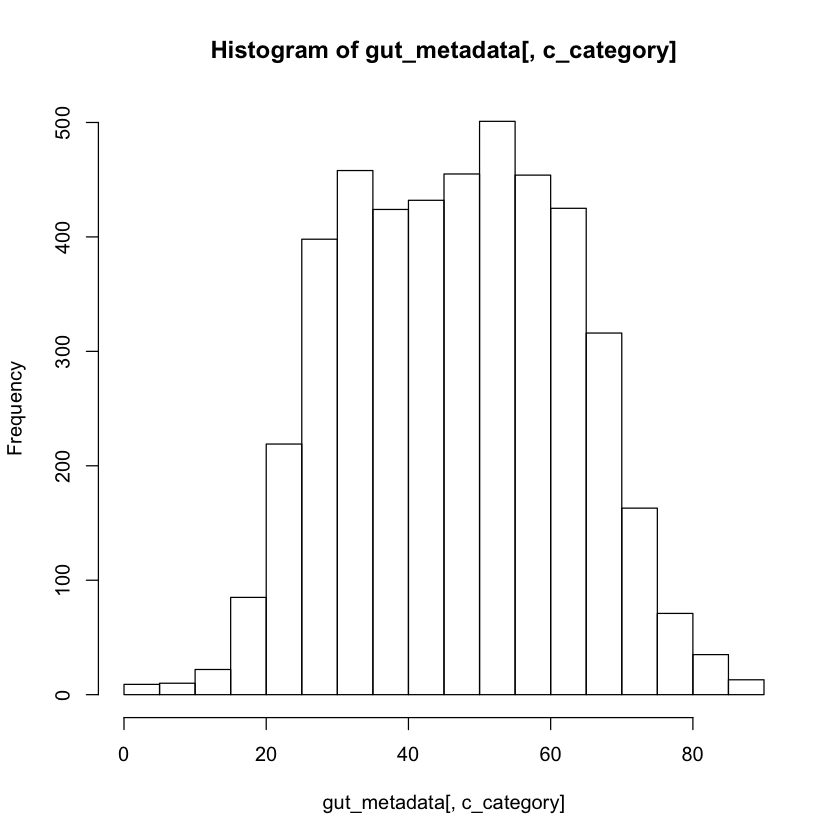

In [7]:
hist(gut_metadata[, c_category])

In [8]:
gut_metadata_k<-gut_metadata[which(!is.na(gut_metadata[, c_category]) & !gut_metadata[, c_category]<18), ]
dim(gut_metadata_k)

[1] 4434    9

In [189]:
length(which(gut_metadata[, 'age']<18))

[1] 56

In [59]:
table(gut_metadata_k[, c("cohort", "country")])

           country
cohort           Argentina Australia Austria Belgium Brazil Canada China
  AGP         13         1        76       3       7      1     45     1
  cantonese    0         0         0       0       0      0      0  1609
           country
cohort      Colombia Czech Republic Denmark France Germany Guernsey Ireland
  AGP              0              1       2     10      15        1      12
  cantonese        0              0       0      0       0        0       0
           country
cohort      Isle of Man Italy Japan Jersey Malta Mexico Morocco Netherlands
  AGP                 1     3     4      1     1      1       1           6
  cantonese           0     0     0      0     0      0       0           0
           country
cohort      New Zealand Norway Oman Singapore Spain Sweden Switzerland Thailand
  AGP                 5      5    1         1     3      7          19        2
  cantonese           0      0    0         0     0      0           0        0
         

In [205]:
table(gut_metadata_k[, "cohort"])
table(gut_metadata[, "cohort"])
gut_metadata_filtered<-gut_metadata_k


      AGP cantonese 
     2770      1609 


      AGP cantonese 
     2966      1609 

In [10]:
sink("Input/gut_data/gut_4434_map.txt"); cat("#SampleID\t"); write.table(gut_metadata_k, quote=F, sep="\t", row.names=T); sink(NULL)

In [12]:
table(gut_metadata_k[, "country"])


                                                                Argentina 
                                  13                                    1 
                           Australia                              Austria 
                                  76                                    3 
                             Belgium                               Brazil 
                                   7                                    1 
                              Canada                                China 
                                  45                                 1610 
                            Colombia                       Czech Republic 
                                   0                                    1 
                             Denmark                               France 
                                   2                                   10 
                             Germany                             Guernsey 
                        

In [13]:
685+1887

[1] 2572

## Oral metadata

In [70]:
s_category<-"qiita_host_sex"  # c("cohort", "sex") | "qiita_host_sex" | c("body_site","qiita_host_sex") 
c_category<-"qiita_host_age"  #"age" "qiita_host_age" "qiita_host_age"

In [71]:
oral_metadata_k<-oral_metadata[which(!is.na(oral_metadata[, c_category])), ]
dim(oral_metadata_k)

[1] 4014 1066

In [140]:
length(which(oral_metadata[, "qiita_study_id"]=="2148"))
length(which(oral_metadata[, "qiita_study_id"]=="2136"))
length(which(oral_metadata[, "qiita_study_id"]=="958"))

[1] 834

[1] 168

[1] 56

In [72]:
drop_idx<-which(oral_metadata[, "qiita_study_id"]=="2148" | oral_metadata[, "qiita_study_id"]=="2136" | oral_metadata[, "qiita_study_id"]=="958")
oral_metadata_k<-oral_metadata[-drop_idx, ]
dim(oral_metadata_k)

[1] 2956 1066

In [73]:
oral_metadata_k<-oral_metadata_k[which(!is.na(oral_metadata_k[, c_category])), ]
dim(oral_metadata_k)

[1] 2956 1066

In [74]:
str(oral_metadata_k[, "qiita_host_age"])
any(is.na(oral_metadata_k[, "qiita_host_age"]))
any(oral_metadata_k[, "qiita_host_age"]<18)

 num [1:2956] 36 58 32.5 42 37 ...


[1] FALSE

[1] FALSE

In [75]:
## BMI
summary(oral_metadata_k[, grep("bmi", names(oral_metadata_k), value=T)])
oral_bmi_drop1<-which(oral_metadata_k[, "bmi_corrected"]<18.5 | oral_metadata_k[, "bmi_corrected"]>30)
oral_bmi_drop2<-which(oral_metadata_k[, "bmi"]<18.5 | oral_metadata_k[, "bmi"]>30)
oral_bmi_drop3<-which(oral_metadata_k[, "bmi_cat"]=="Obese" | oral_metadata_k[, "bmi_cat"]=="Overweight")

length(oral_bmi_drop1)
length(oral_bmi_drop2)
length(oral_bmi_drop3)

      bmi           bmi_185_249  bmi_25_299   bmi_30_349   bmi_35_399  
 Min.   :     0.2        :2956        :2956        :2956        :2956  
 1st Qu.:    19.4   False:   0   False:   0   False:   0   False:   0  
 Median :    22.3   True :   0   True :   0   True :   0   True :   0  
 Mean   :   664.8                                                      
 3rd Qu.:    25.1                                                      
 Max.   :520000.0                                                      
 NA's   :877                                                           
        bmi_cat                  bmi_category  bmi_corrected   bmi_greater_40
            :2273                      :2956   Min.   :12.55        :2956    
 Normal     : 402   Moderately obese   :   0   1st Qu.:21.48   False:   0    
 Obese      :  82   Normal             :   0   Median :23.18   True :   0    
 Overweight : 155   Overweight         :   0   Mean   :24.09                 
 Underweight:  44   Severely obese

[1] 40

[1] 305

[1] 237

In [76]:
summary(oral_metadata_k[, "bmi"]>30)
summary(oral_metadata_k[, "bmi"]<18.5)

   Mode   FALSE    TRUE    NA's 
logical    1916     163     877 

   Mode   FALSE    TRUE    NA's 
logical    1937     142     877 

In [77]:
shared_bmi_drop<-intersect(intersect(oral_bmi_drop1, oral_bmi_drop2), oral_bmi_drop3)
length(shared_bmi_drop)
all_bmi_drop<-union(union(oral_bmi_drop1, oral_bmi_drop2), oral_bmi_drop3)
length(all_bmi_drop)
oral_bmi_drop<-oral_bmi_drop2
length(oral_bmi_drop)

[1] 27

[1] 460

[1] 305

In [78]:
## diseases
summary(oral_metadata_k[, grep("disease", names(oral_metadata_k), value=T)])
## no disease here we need to consider for exclusion as no such description in the paper

 cardiovascular_disease celiac_disease chronicliverdisease_cirrhosis
      :2607             Mode:logical   Mode:logical                 
 False: 332             NA's:2956      NA's:2956                    
 True :  17                                                         
                                                                    
                                                                    
                                                                    
                                                                    
 chronicobstructivepulm_disease crohns_disease current_disease
 Mode:logical                   Mode:logical   Min.   :2      
 NA's:2956                      NA's:2956      1st Qu.:2      
                                               Median :2      
                                               Mean   :2      
                                               3rd Qu.:2      
                                               Max.   :2      
       

In [79]:
summary(oral_metadata_k[, grep("ibd", names(oral_metadata_k), value=T)])
oral_ibd_drop<-which(oral_metadata_k[, "ibd"]=="Colitis" | oral_metadata_k[, "ibd"]=="Crohns" | oral_metadata_k[, "ibd"]=="Other" | oral_metadata_k[, "ibd"]=="Yes.IBS")
length(oral_ibd_drop)

                           ibd        ibd_diagnosis_refined subset_ibd  
                             :1440               :2955           :2238  
 no                          : 790   Microcolitis:   1      False:  54  
 I do not have this condition: 664                          True : 664  
 Colitis                     :  22                                      
 Yes.IBS                     :  12                                      
 Crohns                      :  10                                      
 (Other)                     :  18                                      

[1] 44

In [80]:
summary(oral_metadata_k[, grep("diabetes", names(oral_metadata_k), value=T)])
oral_diabetes_drop<-c(grep("Diagnosed", oral_metadata_k[, "diabetes"]), grep("yes.type.I", oral_metadata_k[, "diabetes"]))

#oral_diabetes_drop<-c(oral_diabetes_drop1, oral_diabetes_drop2)
length(oral_diabetes_drop)

                                                              diabetes   
                                                                  :1427  
 Diagnosed by a medical professional (doctor, physician assistant):   6  
 Diagnosed by an alternative medicine practitioner                :   1  
 I do not have this condition                                     : 687  
 no                                                               : 817  
 Self-diagnosed                                                   :   1  
 yes.type.I                                                       :  17  
 diabetes_mellitustype_1 diabetes_mellitustype_2          diabetes_type 
 Mode:logical            Mode:logical                            :2955  
 NA's:2956               NA's:2956               Type II diabetes:   1  
                                                                        
                                                                        
                                           

[1] 24

In [147]:
summary(oral_metadata_k[, grep("antibiotic", names(oral_metadata_k), value=T)])
#oral_abx_drop1<-which(oral_metadata_k[, "antibiotic_disturbance"]=="True")
oral_abx_drop1<-which(oral_metadata_k[, "antibiotic_history"]=="Week")
oral_abx_drop2<-which(oral_metadata_k[, "antibiotics"]=="week")
oral_abx_drop3<- which(oral_metadata[, "qiita_study_id"]=="2136" | oral_metadata[, "qiita_study_id"]=="958")
length(oral_abx_drop1)
length(oral_abx_drop2)
length(oral_abx_drop3)

   antibiotic    antibiotic_disturbance
 Min.   :1.000        :2122            
 1st Qu.:2.000   False: 622            
 Median :2.000   True : 212            
 Mean   :1.931                         
 3rd Qu.:2.000                         
 Max.   :2.000                         
 NA's   :2783                          
                                      antibiotic_history      antibiotics  
                                               :2244                :2122  
 6 months                                      : 112     6.months   : 192  
 I have not taken antibiotics in the past year.: 442     month      :  50  
 Month                                         :  24     over.a.year: 315  
 Week                                          :  28     week       :  36  
 Year                                          : 106     within.year: 241  
                                                                           
 antibiotics_after_birth antibiotics_at_birth idantibioticdisturbance
  

[1] 28

[1] 36

[1] 224

In [149]:
oral_abx_drop0<-c(oral_abx_drop1, oral_abx_drop2, oral_abx_drop3)
length(oral_abx_drop0)
oral_abx_drop<-c(oral_abx_drop1, oral_abx_drop2)
length(oral_abx_drop)

[1] 288

[1] 64

In [157]:
oral_all_drops<-c(oral_bmi_drop, oral_abx_drop, oral_diabetes_drop, oral_ibd_drop)
length(oral_all_drops)
oral_all_drops0<-c(oral_bmi_drop, oral_abx_drop0, oral_diabetes_drop, oral_ibd_drop)
length(oral_all_drops0)

[1] 437

[1] 661

In [167]:
table(oral_metadata_k[oral_abx_drop, "qiita_study_id"])
table(oral_metadata_k[oral_ibd_drop, "qiita_study_id"])
table(oral_metadata_k[oral_diabetes_drop, "qiita_study_id"])
table(oral_metadata_k[oral_bmi_drop, "qiita_study_id"])
table(oral_metadata_k[oral_all_drops, "qiita_study_id"])


 1841 10317 
   36    28 


1841 
  44 


 1841 10317 
   17     7 


 1841  2010  2024 10317 
  113    12    31   149 


 1841  2010  2024 10317 
  210    12    31   184 

In [162]:
table(oral_metadata[, "qiita_study_id"])
table(oral_metadata_k[, "qiita_study_id"])
table(oral_metadata_filtered[, "qiita_study_id"])


  550   958  1774  1841  2010  2024  2136  2148  2202 10052 10317 11052 
  508    56    48   834    84   285   168   834   285    16   718   178 


  550  1774  1841  2010  2024  2202 10052 10317 11052 
  508    48   834    84   285   285    16   718   178 


  550  1774  1841  2010  2024  2202 10052 10317 11052 
  508    48   642    72   254   285    16   547   178 

In [160]:
table(oral_metadata_k[oral_bmi_drop, "qiita_study_id"])


 1841  2010  2024 10317 
  113    12    31   149 

In [161]:
table(oral_metadata_k[oral_diabetes_drop, "qiita_study_id"])


 1841 10317 
   17     7 

In [203]:
table(oral_metadata_k[oral_ibd_drop, "qiita_study_id"])


1841 
  44 

In [204]:
table(oral_metadata_filtered[, "qiita_study_id"])


  550  1774  1841  2010  2024  2202 10052 10317 11052 
  508    48   642    72   254   285    16   547   178 

In [84]:
sink(paste("Input/oral_data/oral_",nrow(oral_metadata_filtered),"_map.txt",sep="")); cat("#SampleID\t"); write.table(oral_metadata_filtered, quote=F, sep="\t", row.names=T); sink(NULL)

### statistics summary of hosts' country

In [48]:
grep("country", names(oral_metadata_filtered), value=T)
table(oral_metadata_filtered[, "country"])

[1] "country"           "country_of_birth"  "country_residence"


                                                Australia 
                         480                           14 
                     Austria                      Belgium 
                           1                            7 
                      Canada                        China 
                           4                            1 
                     Denmark                      Finland 
                           2                            2 
                      France                    GAZ:Italy 
                           1                            0 
             GAZ:Puerto Rico                 GAZ:Tanzania 
                          38                          254 
GAZ:United States of America                GAZ:Venezuela 
                        1222                           10 
                     Germany                      Ireland 
                           2                            5 
                      Israel                      Moroc

In [30]:
cat("US: ", 444+1222, "\n")
cat("UK: ", 48, "\n")
cat("Tanzania: ", 254, "\n")

US:  1666 
UK:  48 
Tanzania:  254 


In [31]:
# table(oral_metadata_filtered[, "country_of_birth"])

In [32]:
table(oral_metadata_filtered[, "qiita_study_id"])


  550  1774  1841  2010  2024  2202 10052 10317 11052 
  508    48   642    72   254   285    16   547   178 

## skin metadata

In [226]:
skin_metadata_k<-skin_metadata[which(!is.na(skin_metadata[, c_category])), ]
dim(skin_metadata_k)

[1] 4168 1100

In [227]:
skin_metadata_k<-skin_metadata[which(!is.na(skin_metadata[, c_category])), ]
dim(skin_metadata_k)

[1] 4168 1100

In [228]:
drop_idx<-which(skin_metadata[, "qiita_study_id"]=="2149" | skin_metadata[, "qiita_study_id"]=="2150")
skin_metadata_k<-skin_metadata[-drop_idx, ]
length(drop_idx)
dim(skin_metadata_k)

[1] 1679

[1] 2489 1100

In [229]:
summary(skin_metadata_k[, grep("antibiotic", names(skin_metadata_k), value=T)])
skin_abx_drop1<-which(skin_metadata_k[, "antibiotic_history"]=="Week")
skin_abx_drop2<-which(skin_metadata_k[, "antibiotics"]=="week")
skin_abx_drop<-union(skin_abx_drop1, skin_abx_drop2)
length(skin_abx_drop)

 antibiotic_disturbance                                      antibiotic_history
      : 810                                                           :1943    
 False:1251             6 months                                      :  89    
 True : 428             I have not taken antibiotics in the past year.: 358    
                        Month                                         :  13    
                        Week                                          :  10    
                        Year                                          :  76    
      antibiotics  antibiotics_after_birth antibiotics_at_birth
            :810        :2413                   :2413          
 6.months   :379   False:  70              False:  23          
 month      :100   True :   6              True :  53          
 over.a.year:629                                               
 week       : 74                                               
 within.year:497                                        

[1] 84

In [230]:
summary(skin_metadata_k[, grep("ibd", names(skin_metadata_k), value=T)])
skin_ibd_drop<-which(skin_metadata_k[, "ibd"]=="Colitis" | skin_metadata_k[, "ibd"]=="Crohns" | skin_metadata_k[, "ibd"]=="(Other)" | skin_metadata_k[, "ibd"]=="Yes.IBS")
length(skin_ibd_drop)

                           ibd        ibd_diagnosis_refined subset_ibd  
 no                          :1592               :2487           :1932  
 I do not have this condition: 524   Microcolitis:   2      False:  33  
                             : 275                          True : 524  
 Colitis                     :  44                                      
 Yes.IBS                     :  24                                      
 Crohns                      :  19                                      
 (Other)                     :  11                                      

[1] 87

In [231]:
summary(skin_metadata_k[, grep("bmi", names(skin_metadata_k), value=T)])
skin_bmi_drop1<-which(skin_metadata_k[, "bmi_corrected"]<18.5 | skin_metadata_k[, "bmi_corrected"]>30)
skin_bmi_drop2<-which(skin_metadata_k[, "bmi"]<18.5 | skin_metadata_k[, "bmi"]>30)
skin_bmi_drop3<-which(skin_metadata_k[, "bmi_cat"]=="Obese" | skin_metadata_k[, "bmi_cat"]=="Overweight")
length(skin_bmi_drop1)
length(skin_bmi_drop2)
length(skin_bmi_drop3)

      bmi                  bmi_cat     bmi_category   bmi_corrected  
 Min.   :    0.39              :1959   Mode:logical   Min.   :12.55  
 1st Qu.:   20.41   Normal     : 288   NA's:2489      1st Qu.:21.79  
 Median :   22.86   Obese      :  61                  Median :23.40  
 Mean   :  105.95   Overweight : 149                  Mean   :24.60  
 3rd Qu.:   25.39   Underweight:  32                  3rd Qu.:26.54  
 Max.   :33750.00                                     Max.   :52.98  
 NA's   :362                                          NA's   :2228   
        bmiclass   subset_bmi  
            :951        :1932  
 normal     :983   False: 120  
 obese      : 57   True : 437  
 overweight :330               
 underweight:168               
                               
                               

[1] 28

[1] 344

[1] 210

In [232]:
#length(intersect(skin_bmi_drop2, skin_bmi_drop3))
#length(intersect(intersect(skin_bmi_drop2, skin_bmi_drop3), skin_bmi_drop1))
#skin_bmi_drop<-intersect(intersect(skin_bmi_drop2, skin_bmi_drop3), skin_bmi_drop1)

skin_bmi_drop<-skin_bmi_drop2
length(skin_bmi_drop)

[1] 344

In [233]:
summary(skin_metadata_k[, grep("diabetes", names(skin_metadata_k), value=T)])
skin_diabetes_drop<-c(grep("Diagnosed", skin_metadata_k[, "diabetes"]), grep("yes.type.I", skin_metadata_k[, "diabetes"]))
skin_diabetes_drop
#skin_diabetes_drop<-c(skin_diabetes_drop1, skin_diabetes_drop2)
length(skin_diabetes_drop)

                                                              diabetes   
                                                                  : 277  
 Diagnosed by a medical professional (doctor, physician assistant):   4  
 I do not have this condition                                     : 529  
 no                                                               :1643  
 yes.type.I                                                       :  36  
 diabetes_mellitustype_1 diabetes_mellitustype_2 diabetes_type  subset_diabetes
 Mode:logical            Mode:logical            Mode:logical        :1932     
 NA's:2489               NA's:2489               NA's:2489      False:  28     
                                                                True : 529     
                                                                               
                                                                               

[1]  279  375  627 1292    9   19   51   59  176  185  188  214  260  273  410
[16]  461  502  538  543  569  705  757  791  825  963  977 1167 1248 1312 1333
[31] 1337 1472 1549 1636 1829 1876 2145 2196 2426 2460

[1] 40

In [202]:
skin_all_drops<-c(skin_bmi_drop, skin_abx_drop, skin_diabetes_drop, skin_ibd_drop)
table(skin_metadata_k[, "qiita_study_id"])
cat("all filtered"); table(skin_metadata_k[skin_all_drops, "qiita_study_id"])
cat("abx within one month"); table(skin_metadata_k[skin_abx_drop, "qiita_study_id"])
cat("IBD");table(skin_metadata_k[skin_ibd_drop, "qiita_study_id"])
cat("diabetes"); table(skin_metadata_k[skin_diabetes_drop, "qiita_study_id"])
cat("BMI"); table(skin_metadata_k[skin_bmi_drop, "qiita_study_id"])


 1841  2010 10317 11052 
 1679    76   557   177 

all filtered


 1841  2010 10317 
  422    11   122 

abx within one month


 1841 10317 
   74    10 

IBD


1841 
  87 

diabetes


 1841 10317 
   36     4 

BMI


 1841  2010 10317 
  225    11   108 

In [236]:
length(skin_all_drops)

[1] 555

In [235]:
skin_metadata_filtered<-skin_metadata_k[-skin_all_drops, ] #, skin_ibd_drop
dim(skin_metadata_filtered)
sink(paste("Input/skin_data/skin_", nrow(skin_metadata_filtered), "_map.txt", sep="")); cat("#SampleID\t"); write.table(skin_metadata_filtered, quote=F, sep="\t", row.names=T); sink(NULL)

[1] 1975 1100

In [193]:
2234+1975

[1] 4209

### statistics summary of hosts' country

In [49]:
grep("country", names(skin_metadata_filtered), value=T)
table(skin_metadata_filtered[, "country"])

[1] "country"           "country_of_birth"  "country_residence"


                                                Australia 
                         178                            3 
                     Belgium                       Canada 
                           4                            6 
                     Denmark GAZ:United States of America 
                           2                         1358 
                     Germany                       Greece 
                           1                            1 
                   Indonesia                      Ireland 
                           1                           13 
                 Isle of Man                        Japan 
                           0                            1 
                     Morocco                       Poland 
                          14                            1 
              United Kingdom                          USA 
                          27                          365 

In [43]:
dim(skin_metadata_filtered)

[1] 1975 1100

In [44]:
cat("US : ", 365+1358)

US :  1723

In [50]:
cat("total # of samples : ", 4434+2550+1975)

total # of samples :  8959

In [177]:
table(skin_metadata_filtered[, "qiita_study_id"])


 1841  2010 10317 11052 
 1293    65   440   177 

In [178]:
table(skin_metadata_filtered[, "qiita_study_id"])


 1841  2010 10317 11052 
 1293    65   440   177 

In [241]:
4434+2550+1975

[1] 8959

## Age distribution

In [237]:
gut_age<-data.frame(age=gut_metadata_filtered[, "age"], data="gut")
oral_age<-data.frame(age=oral_metadata_filtered[, "qiita_host_age"], data="oral")
skin_age<-data.frame(age=skin_metadata_filtered[, "qiita_host_age"], data="skin")

In [238]:
age_data<-rbind(gut_age, oral_age, skin_age)

In [240]:
dim(age_data)

[1] 8904    2

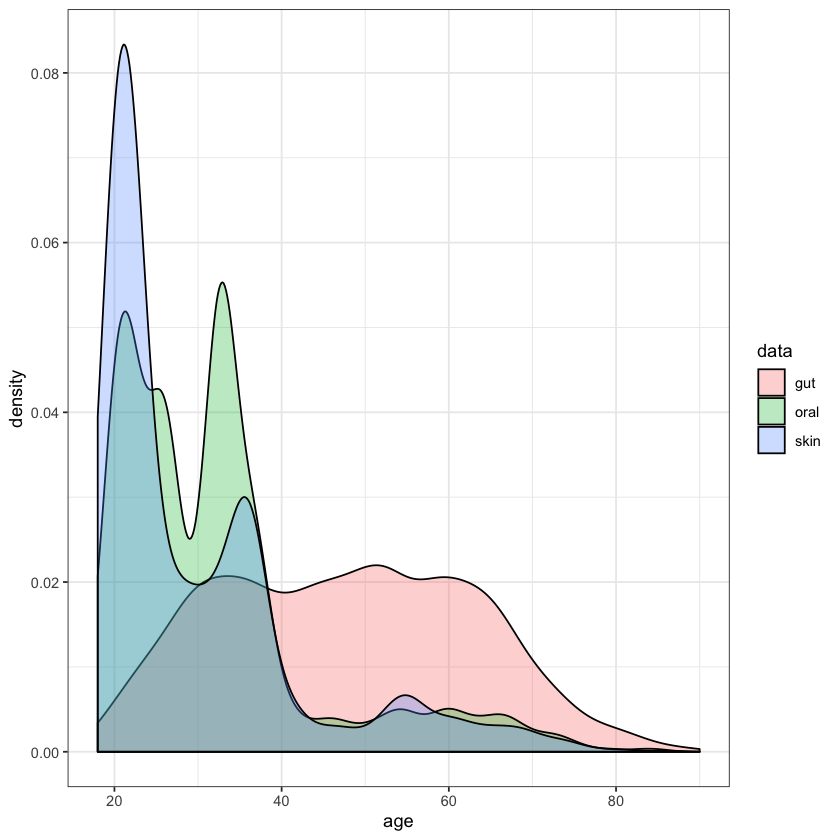

In [239]:
p<-ggplot(age_data, aes(age, fill = data)) + geom_density(alpha = 0.3)+theme_bw()
p
ggsave(filename="age_distribution.png", plot=p, device="png", width=4, height=4)

In [207]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.6

Matrix products: default
BLAS/LAPACK: /Users/huangshi/anaconda3/envs/r-env/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] biomformat_1.10.1 cowplot_1.0.0     pheatmap_1.0.12   ggplot2_3.2.1    
[5] reshape2_1.4.3   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3         pillar_1.4.2       compiler_3.5.1     RColorBrewer_1.1-2
 [5] plyr_1.8.4         base64enc_0.1-3    tools_3.5.1        zeallot_0.1.0     
 [9] digest_0.6.22      uuid_0.1-2         rhdf5_2.26.2       lattice_0.20-38   
[13] jsonlite_1.6       evaluate_0.14      lifecycle_0.1.0    tibble_2.1.3      
[17] gtable_0.3.0       pkgconfig_2.0.3    rlang_0.4.1        Matrix_1.2-17     
[21] IRdisplay_0.7.0    IRkernel_1.0.2     repr_